<a href="https://colab.research.google.com/github/jjuandiego099/cuadernos-y-proyectos-IA/blob/main/Fundamento_Cuaderno_12_Random_Forest_(Bosques_Aleatorios).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Explicación de Random Forest (Bosques Aleatorios)</font>
Un Random Forest es un modelo de aprendizaje automático que utiliza múltiples árboles de decisión para realizar predicciones. Cada árbol es entrenado de manera independiente sobre un subconjunto aleatorio de los datos, y la predicción final del modelo se obtiene promediando (en problemas de regresión) o tomando la clase más frecuente (en problemas de clasificación) entre todos los árboles. Este enfoque de combinar múltiples modelos se denomina modelos ensamblados o "ensemble" y tiene la ventaja de reducir la varianza sin aumentar significativamente el sesgo.

![imagen](https://miro.medium.com/v2/resize:fit:416/0*Z52NbkU3Uddq3gX7.png)

En la imagen se aprecian n arboles creados aleatoriamente, y en la etapa de predicción se tienen 2 clasificaciones por la Clase B y un Clasificación en la Clase A, cada árbol se contruye independiente al otro. Dado que es clasificiación la decisión final es la clase mas repetida y en este caso la Clase Final es la Clase B.

## <font color="red">12.1 Principales características de Random Forest </font>
* Bootstrapping (Muestreo con reposición): Para entrenar cada árbol, se toma una muestra aleatoria de los datos con reposición. Esto significa que algunos puntos de datos pueden repetirse en una muestra, mientras que otros no se usarán. Cada árbol recibe un conjunto diferente de datos, lo que asegura diversidad entre ellos.
* Subconjunto aleatorio de características: Al construir cada árbol, en cada nodo de decisión, se selecciona un subconjunto aleatorio de características (atributos) para decidir la división. Esto ayuda a evitar que los árboles se vuelvan demasiado similares entre sí, lo cual mejora la precisión global del modelo.
* Predicción final: Una vez que los árboles están entrenados, cuando se realiza una predicción, el resultado se calcula tomando el promedio de las predicciones de todos los árboles (en problemas de regresión) o la clase más frecuente (en problemas de clasificación). Este proceso de agregación mejora la estabilidad y precisión del modelo.
* Out-of-Bag Error (OOB): Debido al proceso de bootstrapping, algunas muestras o registros de datos del dataset, no se usan en cada árbol. Estos puntos se conocen como datos out-of-bag (OOB) y se pueden usar para calcular una estimación del error del modelo sin necesidad de usar un conjunto de validación separado.


## <font color="red">12.2 Evaluación y Mejoras </font>

Uno de los beneficios clave de los Random Forests es que, debido a la variedad de los árboles que componen el modelo, la varianza del modelo se reduce significativamente. Además, el uso del OOB error ofrece una manera eficiente de evaluar el rendimiento del modelo sin necesidad de usar un conjunto de datos adicional para validación.

Por otro lado, el modelo también tiene la capacidad de proporcionar importancia de las características, lo que significa que podemos saber qué variables (como las horas de estudio o la edad en los ejemplos anteriores) tienen mayor impacto en la predicción. Esta información puede ser útil para mejorar los modelos o para la toma de decisiones en un contexto práctico, como mejorar los planes de estudio para los alumnos o ajustar el diagnóstico en el caso de los pacientes.


---

## <font color="red">12.3 Ventajas de Random Forest </font>
* Reducción de la varianza: Al combinar varios árboles de decisión, el modelo tiene una menor probabilidad de sobreajustarse a los datos de entrenamiento.
* Robustez: Es menos sensible a los errores en los datos y puede manejar datos faltantes de manera más efectiva.
* Escalabilidad: Puede trabajar con grandes conjuntos de datos y se adapta bien tanto a problemas de clasificación como de regresión.
* Evaluación de importancia: Random Forest permite obtener una evaluación clara sobre qué características son más relevantes para la predicción.


---

## <font color="red">12.6 Ejercicio 1: Predicción del puntaje de alumnos usando Random Forest (Regresión) </font>

#### Objetivo:
Predecir el puntaje de un examen de un alumno a partir de sus horas de estudio y el porcentaje de asistencia a clases.

#### Datos:
| ID | Horas de estudio | Asistencia a clases | Puntaje |
|----|------------------|---------------------|---------|
| 1  | 5                | 90%                 | 75      |
| 2  | 8                | 80%                 | 85      |
| 3  | 2                | 50%                 | 60      |
| 4  | 6                | 70%                 | 78      |
| 5  | 10               | 95%                 | 92      |


### Pasos para el ejercicio:
* Preprocesamiento de los datos:
  * Convertir las características numéricas y las categorías (como el porcentaje de asistencia) a un formato adecuado para el modelo.
  * Asegúrate de que todos los valores estén en el mismo rango de escala si es necesario.

* División de los datos:
  * Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba (usualmente, 80% para entrenamiento y 20% para prueba).

* Entrenamiento del modelo de Random Forest:
  * Utiliza una biblioteca como scikit-learn para entrenar un modelo de regresión de Random Forest.







In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crear el DataFrame
data = {
    'Horas de estudio': [5, 8, 2, 6, 10,4,2],
    'Asistencia a clases': [90, 80, 50, 70, 95,35,30],
    'Puntaje': [75, 85, 60, 78, 92, 40,30]
}

df = pd.DataFrame(data)

df


,Horas de estudio,Asistencia a clases,Puntaje
0,5,90,75
1,8,80,85
2,2,50,60
3,6,70,78
4,10,95,92
5,4,35,40
6,2,30,30


In [ ]:
# Definir las características (X) y el objetivo (y)
X = df[['Horas de estudio', 'Asistencia a clases']]
y = df['Puntaje']

# Dividir los datos en entrenamiento y prueba
# SON MUY POCOS DATOS PARA REALIZAR DIVISION ENTRE DATOS DEENTRENAMIENTO Y PRUEBA
# ADEMAS NO PODRÍA HACER Bootstrapping NI Subconjuto aletorio de Caracteristicas

# Crear y entrenar el modelo
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [ ]:
# Hacer predicciones
y_pred = modelo_rf.predict(X)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 21.797471428571424


In [ ]:
y_pred

array([73.94, 82.96, 51.2 , 75.89, 88.85, 40.85, 37.4 ])

In [ ]:
y.to_numpy()

array([75, 85, 60, 78, 92, 40, 30])

In [ ]:
# Datos de un nuevo paciente
nuevo_alumno = pd.DataFrame([[5, 100],[10,85],[3,45]], columns=['Horas de estudio', 'Asistencia a clases'])

# Predecir si el paciente tiene diabetes
prediccion = modelo_rf.predict(nuevo_alumno)

print("Puntaje es:", prediccion)

Puntaje es: [75.64 86.08 51.2 ]


# Dubujar 5 arboles de los 100 que usamos en el Bosque Aleatorio

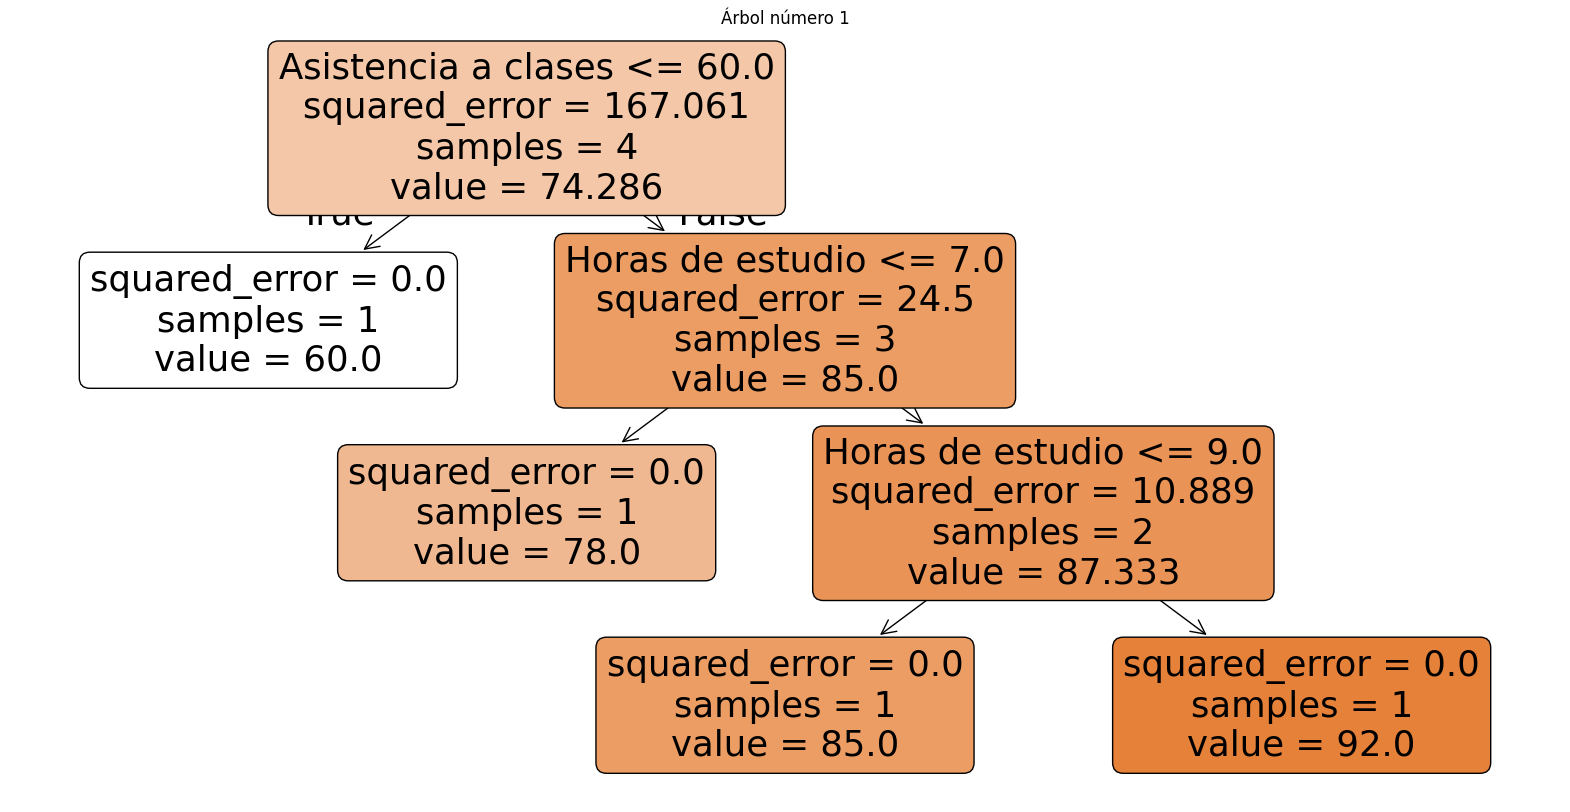

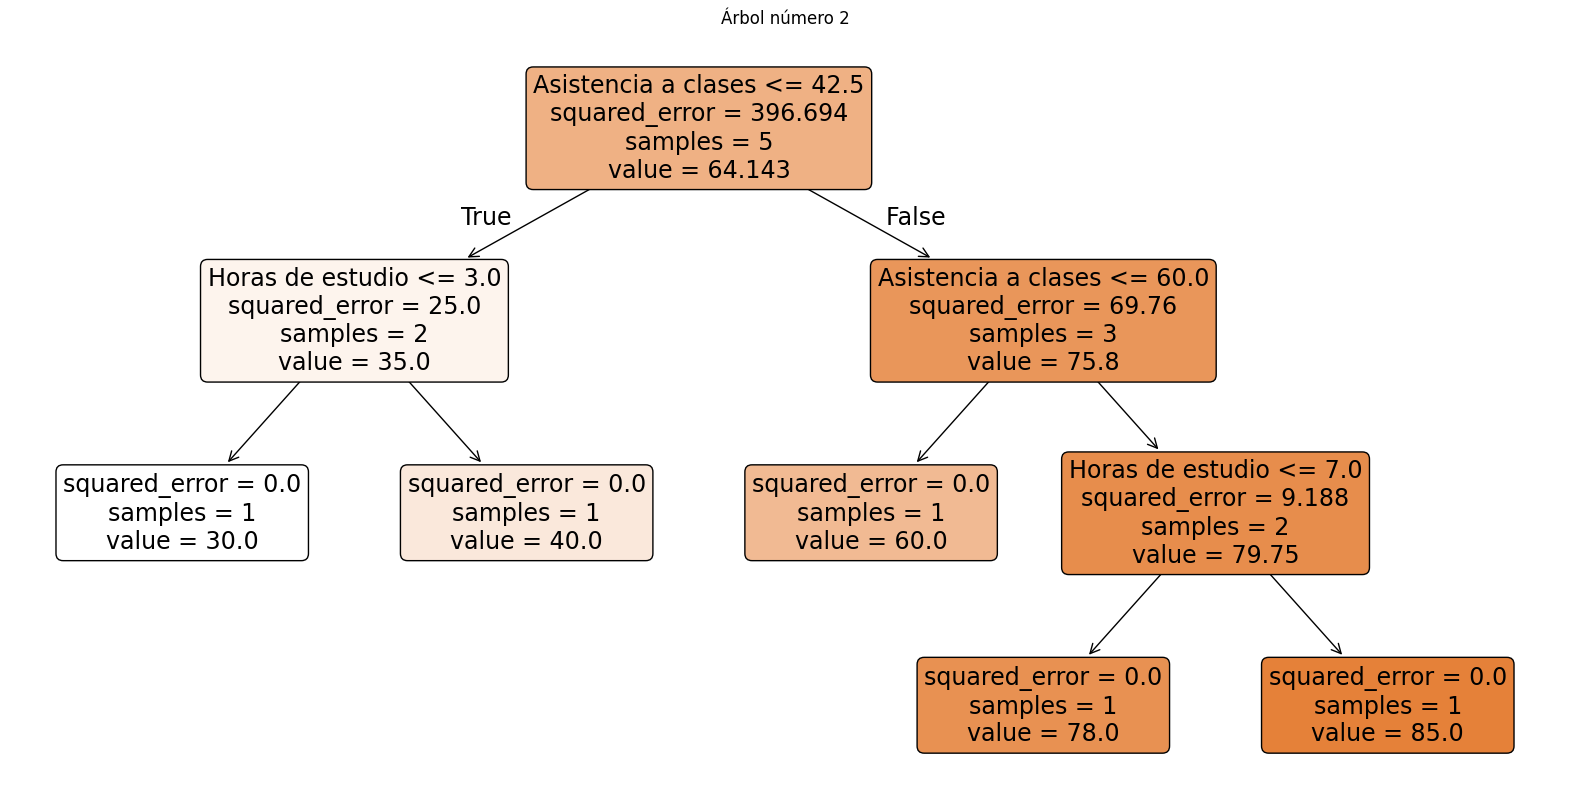

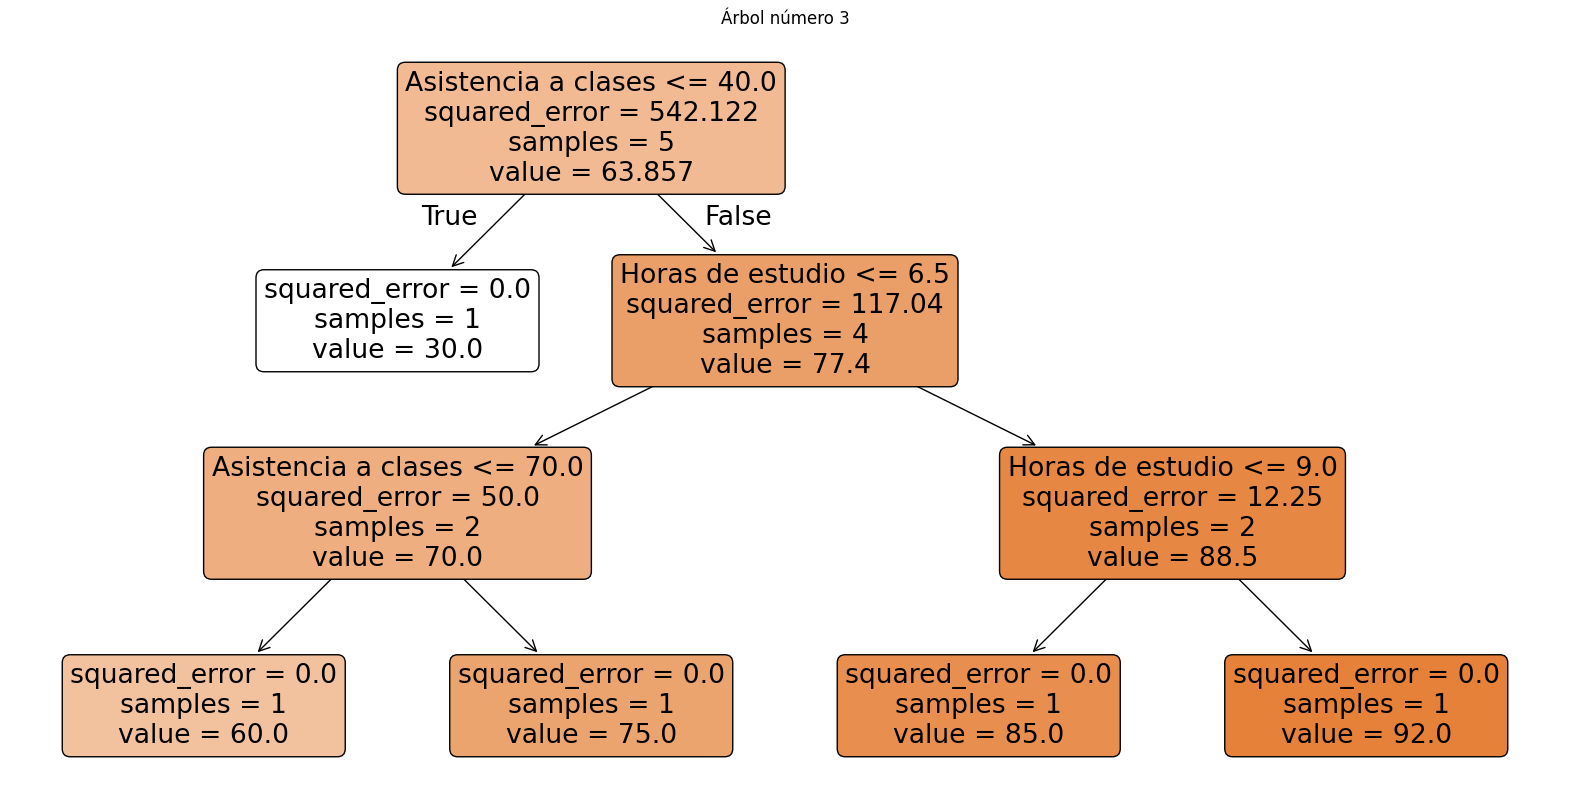

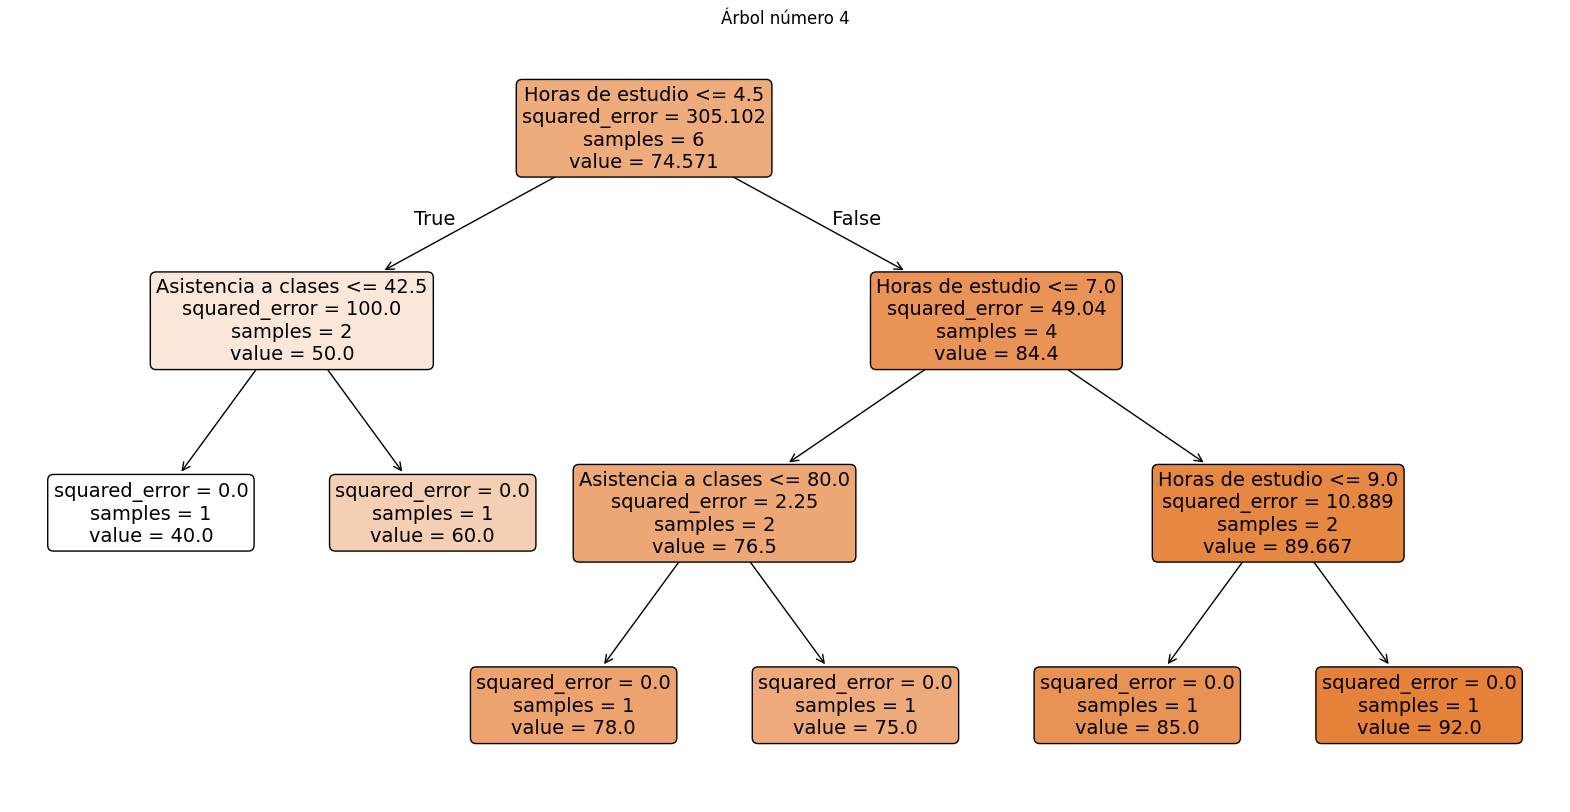

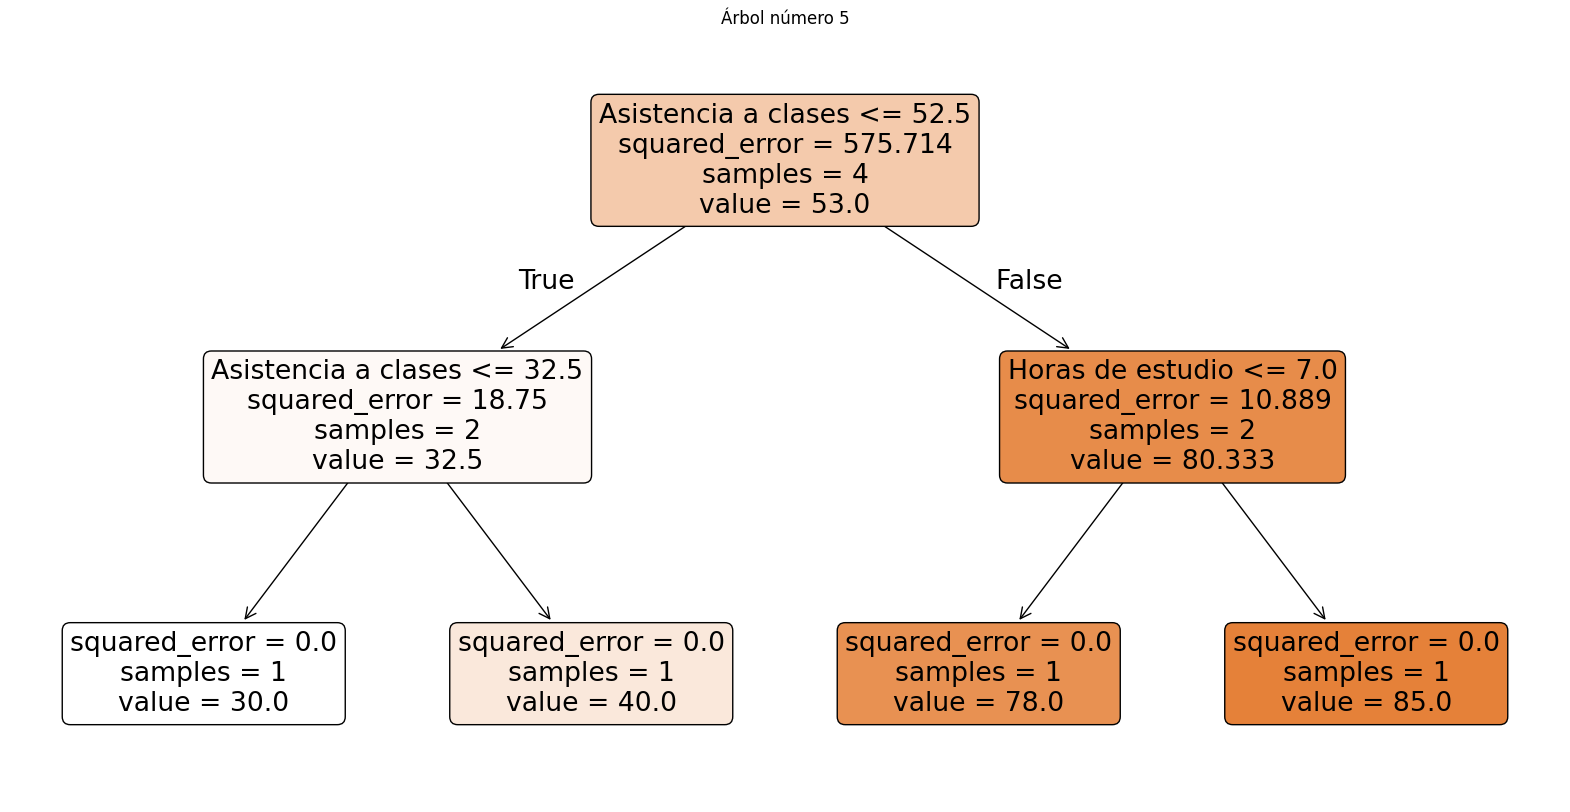

In [ ]:
#dibujar todos los arboles de bosque aleatorio modelo_rf

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Number of trees in the forest (adjust as needed)
num_trees_to_plot = min(len(modelo_rf.estimators_), 5) # Plot up to 5 trees

for i in range(num_trees_to_plot):
    tree = modelo_rf.estimators_[i]
    plt.figure(figsize=(20, 10))  # Tamaño de la figura, puedes ajustarlo
    plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
    plt.title(f"Árbol número {i+1}")
    plt.show()



# Pesos de la predicción

In [ ]:
# Obtener los pesos de las predicciones
#Dado que no hay pesos en RandomForestRegressor en si, se puede aproximar a la importancia de las caracteristicas
feature_importances = modelo_rf.feature_importances_
print(f"Importancia de las características:\n{feature_importances}")
modelo_rf.feature_names_in_

Importancia de las características:
[0.36823006 0.63176994]


array(['Horas de estudio', 'Asistencia a clases'], dtype=object)

In [ ]:
nuevo_alumno = pd.DataFrame([[5, 100]], columns=['Horas de estudio', 'Asistencia a clases'])

# Convertir a NumPy array para evitar warnings
nuevo_alumno_array = nuevo_alumno.values  # sin nombres de columnas

# Predecir
prediccion = modelo_rf.predict(nuevo_alumno)
importances = []
for tree in modelo_rf.estimators_:
      importances.append(tree.predict(nuevo_alumno_array))  # ahora sin warning

print("Predicción de cada árbol:")
for i, prediction in enumerate(importances):
    print(f"Árbol {i+1}: {prediction}")
print("Puntaje es:", prediccion)

Predicción de cada árbol:
Árbol 1: [78.]
Árbol 2: [78.]
Árbol 3: [75.]
Árbol 4: [75.]
Árbol 5: [78.]
Árbol 6: [78.]
Árbol 7: [40.]
Árbol 8: [75.]
Árbol 9: [92.]
Árbol 10: [75.]
Árbol 11: [75.]
Árbol 12: [75.]
Árbol 13: [75.]
Árbol 14: [75.]
Árbol 15: [75.]
Árbol 16: [75.]
Árbol 17: [75.]
Árbol 18: [75.]
Árbol 19: [92.]
Árbol 20: [75.]
Árbol 21: [92.]
Árbol 22: [92.]
Árbol 23: [60.]
Árbol 24: [75.]
Árbol 25: [92.]
Árbol 26: [40.]
Árbol 27: [92.]
Árbol 28: [40.]
Árbol 29: [75.]
Árbol 30: [75.]
Árbol 31: [92.]
Árbol 32: [92.]
Árbol 33: [75.]
Árbol 34: [75.]
Árbol 35: [75.]
Árbol 36: [75.]
Árbol 37: [75.]
Árbol 38: [75.]
Árbol 39: [75.]
Árbol 40: [75.]
Árbol 41: [75.]
Árbol 42: [75.]
Árbol 43: [85.]
Árbol 44: [92.]
Árbol 45: [75.]
Árbol 46: [92.]
Árbol 47: [75.]
Árbol 48: [40.]
Árbol 49: [75.]
Árbol 50: [75.]
Árbol 51: [60.]
Árbol 52: [30.]
Árbol 53: [75.]
Árbol 54: [92.]
Árbol 55: [75.]
Árbol 56: [78.]
Árbol 57: [92.]
Árbol 58: [75.]
Árbol 59: [78.]
Árbol 60: [75.]
Árbol 61: [75.]
Árbol 6

* Evaluación:
  * La evaluación se realiza mediante el Error Cuadrático Medio (MSE), que mide qué tan cerca están las predicciones del modelo de los valores reales.
* Predicción:
  * Después de entrenar el modelo, puedes hacer predicciones sobre el puntaje de alumnos nuevos (conociendo sus horas de estudio y asistencia).

### Pregunta:
¿Qué puntaje predice el modelo para un alumno que estudia 7 horas y tiene un 85% de asistencia a clases?




#  <font color="rede">!NOTA!

Para validar el modelo no es suficiente hacer el análisis del MSE, ya que este tiene significancia si se compara con otros modelo de regresión.

Para analizar si el modelo tiene validez, usaremos "Evaluación de supuestos clásicos y significancia de predictores" tales como  Multicolinealidad, Normalidad de los errores,  Homocedasticidad, Independencia de errores,  Significancia de los predictor,  Error Estándar Residual (RSE), Coeficiente de Determinación (R²). Pero este tema lo abarcaremos cuando veamos formalmente regresión lineal.


---

## <font color="red">Ejercicio 2: Modelo de Clasificación de pacientes con Diabetes usando Random Forest

#### Objetivo:
Usar un Random Forest para predecir si un paciente tiene diabetes, basado en características como la glucosa, la presión arterial, el IMC, la edad, etc.

#### Pasos para el ejercicio:

##### 1. Cargar los datos: Usamos pandas para cargar los datos directamente desde el archivo CSV en GitHub.


In [ ]:
import pandas as pd

# Cargar el dataset desde el enlace proporcionado en GitHub
url = 'https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/diabetes.csv'
df = pd.read_csv(url, sep=';')  # El separador es ';' según la muestra proporcionada

# Mostrar las primeras filas del dataset
df.head()


,Embarazos,Glucosa,PresiónArterial,GrosorDeLaPiel,Insulina,IMC,FunciónPedigríDeDiabetes,Edad,Resultad
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### 2. Preprocesamiento de los datos: En este paso, manejamos valores faltantes, convertimos las columnas a tipos adecuados (si es necesario) y dividimos los datos en características (X) y la etiqueta objetivo (Y).


In [ ]:
# Reemplazar valores nulos (si los hubiera) por la media de la columna o eliminar las filas con nulos
df.fillna(df.mean(), inplace=True)

# Dividir los datos en características (X) y la variable objetivo (Y)


X = df.drop('Resultad', axis=1)  # 'Resultad' es la columna objetivo (0 o 1)
y = df['Resultad']  # Etiqueta: 0 = no tiene diabetes, 1 = tiene diabetes

###### Dividir los datos en conjuntos de entrenamiento y prueba: Separamos el conjunto de datos en un 80% para entrenamiento y un 20% para prueba utilizando train_test_split.


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento (80%) y de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar las dimensiones de los conjuntos
print(X_train.shape, X_test.shape)


(614, 8) (154, 8)


##### 4. Entrenamiento del modelo Random Forest: Creamos y entrenamos un RandomForestClassifier para predecir si un paciente tiene diabetes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##### 5. Evaluación del modelo: Evaluamos el modelo utilizando las métricas de precisión y la matriz de confusión para ver cuántos pacientes fueron correctamente clasificados.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Realizar las predicciones sobre el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", cm)


Precisión del modelo: 0.7597402597402597
Matriz de confusión:
 [[85 15]
 [22 32]]


##### 6. Predicción sobre nuevos pacientes: Usamos el modelo entrenado para hacer predicciones sobre nuevos pacientes. Por ejemplo, si tenemos un paciente con las siguientes características:
* Embarazos: 5
* Glucosa: 120
* PresiónArterial: 80
* GrosorDeLaPiel: 25
* Insulina: 0
* IMC: 28
* FunciónPedigríDeDiabetes: 0.5
* Edad: 40

##### Podemos hacer una predicción:


In [ ]:
# Datos de un nuevo paciente
nuevo_paciente = pd.DataFrame([[5, 120, 80, 25, 0, 28, 0.5, 40]],columns=X_train.columns)

# Predecir si el paciente tiene diabetes
prediccion = rf.predict(nuevo_paciente)

if prediccion == 1:
    print("El paciente tiene diabetes.")
else:
    print("El paciente no tiene diabetes.")


El paciente no tiene diabetes.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

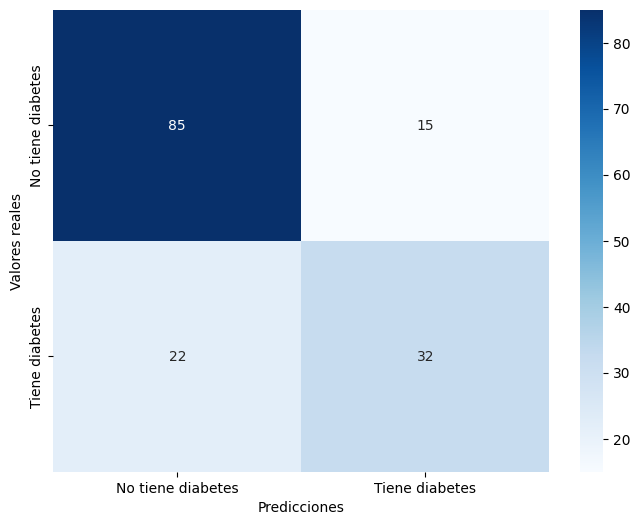

In [ ]:
#Matriz de confusión en seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No tiene diabetes', 'Tiene diabetes'], yticklabels=['No tiene diabetes', 'Tiene diabetes'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt

####Evaluación:
* Precisión: La precisión mide cuántas veces el modelo clasificó correctamente a los pacientes como diabéticos o no diabéticos.
* Matriz de confusión: Nos ayuda a ver cómo se distribuyen las predicciones en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
  * Verdaderos positivos (TP): Predijo que tiene diabetes y realmente tiene.
  * Falsos positivos (FP): Predijo que tiene diabetes, pero realmente no tiene.
  * Verdaderos negativos (TN): Predijo que no tiene diabetes y realmente no tiene.
  * Falsos negativos (FN): Predijo que no tiene diabetes, pero realmente tiene.


# Vamos a utilizando gridsearch para mejorar el modelo


1. Crear los parámteros del gridsearch

* criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
* max_depth 1 a 10
* min_samples_split de 1 a 5
* min_samples_leaf 1 a 5
* n_estimators 50 a 150
* max_features{“sqrt”, “log2”, None}
* bootstrap True o False



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(5, 10),
    'min_samples_split': range(2, 5),
    'min_samples_leaf': range(1, 5),
    'n_estimators': [50, 80,100,150],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)


In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(5, 10),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': [50, 80, 100, 150]},
             scoring='accuracy', verbose=3)

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámteros:", best_params)
print("Mejor Scores:", best_score)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy en los datos de prueba:", accuracy)

Mejores parámteros: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}
Mejor Scores: 0.7899506863921099
Accuracy en los datos de prueba: 0.7532467532467533


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

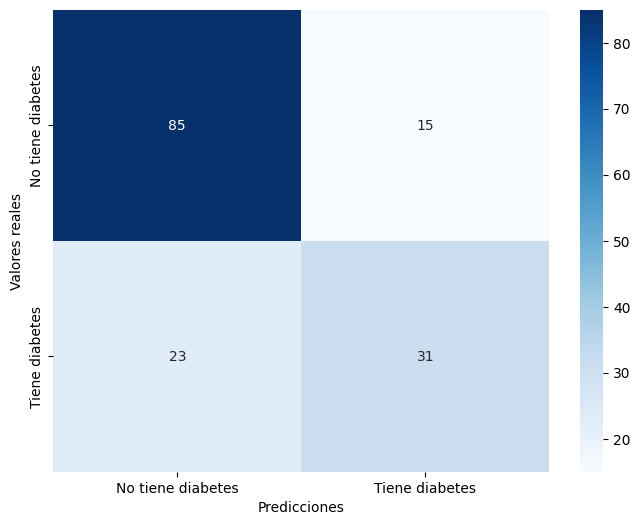

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No tiene diabetes', 'Tiene diabetes'], yticklabels=['No tiene diabetes', 'Tiene diabetes'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt